# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Faizah Rizki Auliawati
- **Email:** frauliawati@gmail.com
- **ID Dicoding:** MC0092D5X2547


## Menentukan Pertanyaan Bisnis

- Kapan waktu dengan jumlah penyewaan sepeda paling tinggi dan paling rendah?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Bike Dataset/hour.csv')

Insight :
- Dataset yang digunakan merupakan dataset sewa sepeda yang berisi informasi tentang jumlah penyewaan sepeda berdasarkan berbagai faktor seperti cuaca, musim, hari kerja, dan lainnya.
Dataset diimpor menggunakan pandas.read_csv().

### Assessing Data

##### Memeriksa Struktur Dataset
Menampilkan dimensi dataset, lima baris pertama, serta informasi tipe data untuk memahami struktur dataset.


In [215]:
print(df.shape)
print(df.head())

(17379, 17)
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Dataset cukup besar, cocok untuk analisis tren dan prediksi.
- Data memiliki banyak fitur waktu yang bisa digunakan untuk melihat pola penyewaan.

####Memeriksa Informasi Dataset

Menampilkan informasi tipe data untuk memahami struktur dataset.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Data sudah bersih (tidak perlu imputasi missing values).
- Perlu konversi dteday ke tipe datetime untuk analisis waktu.

####Statistik Deskriptif

Melihat ringkasan statistik untuk memahami distribusi data.

In [217]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Suhu dan kecepatan angin perlu dicek skalanya (apakah sudah diubah atau masih dalam satuan asli).
- Perlu mengecek apakah windspeed = 0 disebabkan karena pencatatan yang tidak akurat.

####Mengecek Missing Value dan Duplikasi

Memeriksa apakah ada data yang hilang atau duplikasi dalam dataset.

In [219]:
missing_values_count = df.isnull().sum().sum()
duplicated_rows_count = df.duplicated().sum()

print(f"Missing Value: {missing_values_count}")
print(f"Duplicate: {duplicated_rows_count}")

Missing Value: 0
Duplicate: 0


**Insight:**
- Dataset tidak perlu pembersihan lebih lanjut dari sisi missing values dan duplikasi.



####Jumlah Nilai Unik per Kolom  
- Untuk memahami variasi data dalam dataset, kita menghitung jumlah nilai unik di setiap kolom. Hal ini membantu dalam mengidentifikasi apakah suatu kolom bersifat kategorikal atau numerik kontinu.

In [220]:
unique_counts = pd.DataFrame({'Kolom': df.columns,
                              'Jumlah_Nilai_Unik': [df[col].nunique() for col in df.columns]})
print(unique_counts)

         Kolom  Jumlah_Nilai_Unik
0      instant              17379
1       dteday                731
2       season                  4
3           yr                  2
4         mnth                 12
5           hr                 24
6      holiday                  2
7      weekday                  7
8   workingday                  2
9   weathersit                  4
10        temp                 50
11       atemp                 65
12         hum                 89
13   windspeed                 30
14      casual                322
15  registered                776
16         cnt                869


**Insight:**
- Bisa dilakukan grouping berdasarkan waktu (hari, jam, musim) untuk melihat pola penyewaan.
- Perbedaan jumlah penyewaan antara pengguna kasual vs terdaftar bisa menjadi faktor analisis.

### Cleaning Data

####Mengganti Nama Kolom

In [221]:
expected_columns = [
    'instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday',
    'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
    'windspeed', 'casual', 'registered', 'cnt'
]

missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}")
else:

    df.rename(columns={
        'instant': 'Indeks',
        'dteday': 'Tanggal',
        'season': 'Musim',
        'yr': 'Tahun',
        'mnth': 'Bulan',
        'hr': 'Jam',
        'holiday': 'Hari_Libur',
        'weekday': 'Hari',
        'workingday': 'Hari_Kerja',
        'weathersit': 'Cuaca',
        'temp': 'Temperatur',
        'atemp': 'Temperatur_Terasa',
        'hum': 'Kelembapan',
        'windspeed': 'Kecepatan_Angin',
        'casual': 'Pengguna_Kasual',
        'registered': 'Pengguna_Terdaftar',
        'cnt': 'Jumlah_Sewa'
    }, inplace=True)

    print("Kolom setelah diubah:", df.columns)


Kolom setelah diubah: Index(['Indeks', 'Tanggal', 'Musim', 'Tahun', 'Bulan', 'Jam', 'Hari_Libur',
       'Hari', 'Hari_Kerja', 'Cuaca', 'Temperatur', 'Temperatur_Terasa',
       'Kelembapan', 'Kecepatan_Angin', 'Pengguna_Kasual',
       'Pengguna_Terdaftar', 'Jumlah_Sewa'],
      dtype='object')


**Insight :**  
- Nama kolom telah diperjelas agar lebih mudah dibaca dan dipahami saat analisis.
- Tidak ada perubahan tipe data, hanya perubahan nama untuk kejelasan interpretasi.

####Mengonversi Tanggal ke Format Datetime dan Mengatur Tipe Data Kategorikal

In [222]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

categorical_cols = ['Musim', 'Tahun', 'Bulan', 'Jam', 'Hari_Libur', 'Hari', 'Hari_Kerja', 'Cuaca']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Indeks              17379 non-null  int64         
 1   Tanggal             17379 non-null  datetime64[ns]
 2   Musim               17379 non-null  category      
 3   Tahun               17379 non-null  category      
 4   Bulan               17379 non-null  category      
 5   Jam                 17379 non-null  category      
 6   Hari_Libur          17379 non-null  category      
 7   Hari                17379 non-null  category      
 8   Hari_Kerja          17379 non-null  category      
 9   Cuaca               17379 non-null  category      
 10  Temperatur          17379 non-null  float64       
 11  Temperatur_Terasa   17379 non-null  float64       
 12  Kelembapan          17379 non-null  float64       
 13  Kecepatan_Angin     17379 non-null  float64   

**Insight :**
- Tanggal telah dikonversi ke tipe datetime64 untuk memungkinkan analisis berbasis waktu.
- Kolom kategorikal seperti Musim, Tahun, dan Cuaca dikonversi ke tipe category agar lebih efisien dalam memori dan memudahkan analisis.

In [224]:
windspeed_zeros = (df['Kecepatan_Angin'] == 0).sum()
print(f"Jumlah data dengan windspeed = 0: {windspeed_zeros}")


Jumlah data dengan windspeed = 0: 2180


In [225]:
df['Temperatur_C'] = df['Temperatur'] * 50

**Insight:**
- Temperatur awalnya dinormalisasi dalam skala 0-1.
- Kini telah dikonversi ke satuan Celsius agar lebih mudah diinterpretasi dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

####Analisis Tren Jumlah Sewa Berdasarkan Jam

In [239]:
df_Jam = df.groupby("Jam")["Jumlah_Sewa"].mean().reset_index()

print(df_Jam.sort_values(by="Jumlah_Sewa", ascending=False).head(5))
print(df_Jam.sort_values(by="Jumlah_Sewa", ascending=True).head(5))


   Jam  Jumlah_Sewa
17  17   461.452055
18  18   425.510989
8    8   359.011004
16  16   311.983562
19  19   311.523352
  Jam  Jumlah_Sewa
4   4     6.352941
3   3    11.727403
5   5    19.889819
2   2    22.869930
1   1    33.375691


<ipython-input-239-16736d2617f7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Jam = df.groupby("Jam")["Jumlah_Sewa"].mean().reset_index()


**Insight:**

- Jam sibuk terjadi pada pukul 17:00 dan 18:00, kemungkinan karena waktu pulang kerja.
- Jam sepi terjadi antara pukul 01:00 - 05:00, kemungkinan karena tengah malam hingga subuh.

####Analisis Jumlah Sewa Berdasarkan Musim

In [244]:
musim_dict = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}

seasonal_rentals = df.groupby('Musim', as_index=False)['Jumlah_Sewa'].mean()
seasonal_rentals['Musim'] = seasonal_rentals['Musim'].map(musim_dict)

seasonal_rentals = seasonal_rentals.sort_values(by="Jumlah_Sewa", ascending=False)
print(seasonal_rentals)

    Musim  Jumlah_Sewa
2   Gugur   236.016237
1   Panas   208.344069
3  Dingin   198.868856
0    Semi   111.114569


<ipython-input-244-634a23c9c34d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = df.groupby('Musim', as_index=False)['Jumlah_Sewa'].mean()


**Insight:**
- Musim Gugur memiliki jumlah sewa tertinggi, mungkin karena cuaca yang nyaman untuk bersepeda.
- Musim Semi memiliki jumlah sewa terendah, kemungkinan karena cuaca yang masih kurang nyaman atau sering hujan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pola Penyewaan Sepeda Berdasarkan Jam?

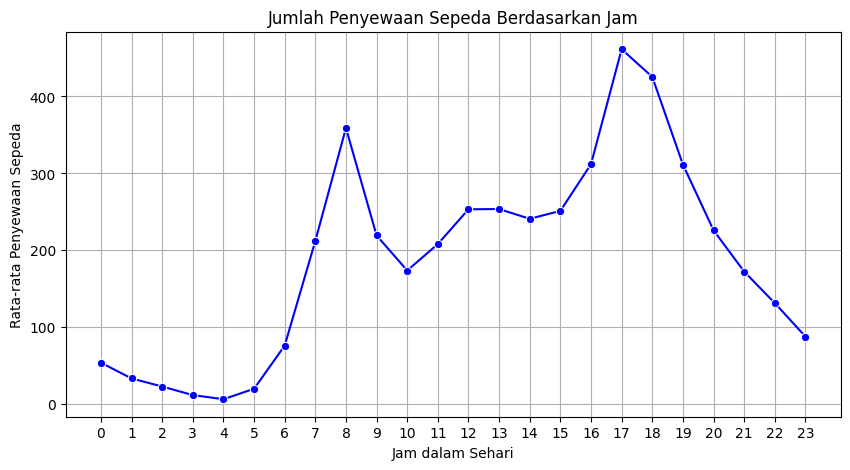

In [241]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df_Jam["Jam"], y=df_Jam["Jumlah_Sewa"], marker="o", color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight :**
-  Pola penyewaan sepeda membentuk dua puncak utama, yaitu pagi (sekitar jam 08:00) dan sore (sekitar jam 17:00 - 18:00).
-  Lonjakan pagi kemungkinan disebabkan oleh orang yang berangkat kerja atau sekolah.
-  Lonjakan sore terjadi saat jam pulang kerja, yang menunjukkan banyaknya pengguna sepeda untuk perjalanan pulang.
-  Aktivitas penyewaan sepeda rendah di tengah malam hingga subuh, yang wajar karena jam istirahat.

### Pertanyaan 2 : Bagaimana Pengaruh Musim terhadap Jumlah Penyewaan Sepeda?

<ipython-input-245-6996dbf9fd4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rentals["Musim"], y=seasonal_rentals["Jumlah_Sewa"], palette="viridis")


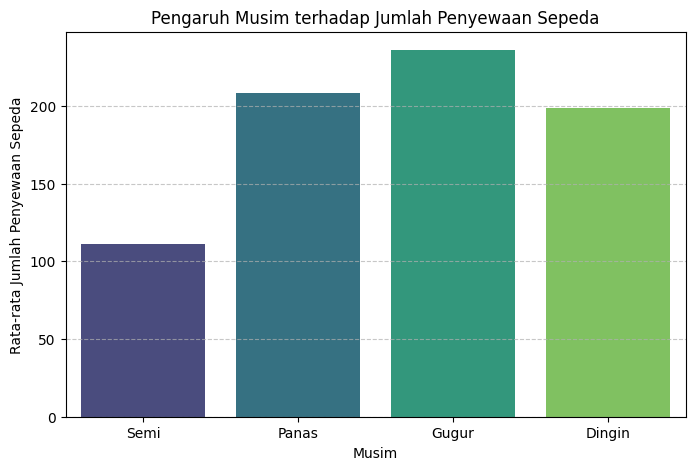

In [245]:
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rentals["Musim"], y=seasonal_rentals["Jumlah_Sewa"], palette="viridis")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Musim terhadap Jumlah Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Musim gugur memiliki penyewaan tertinggi, kemungkinan karena cuaca yang stabil dan nyaman untuk bersepeda.
- Musim panas juga menunjukkan jumlah sewa yang tinggi, meskipun mungkin lebih panas, tetapi tetap populer untuk aktivitas luar ruangan.
- Musim dingin dan musim semi memiliki lebih sedikit penyewaan, kemungkinan karena suhu dingin atau kondisi cuaca yang kurang mendukung seperti hujan atau salju.
- Faktor lain seperti hujan dan angin mungkin juga berpengaruh terhadap pola penyewaan sepeda selama musim tertentu.



## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclution pertanyaan 1 :**

 Berdasarkan analisis clustering waktu, penyewaan sepeda mencapai puncak pada jam sibuk pagi (06:00–10:00) dan sore (16:00–21:00). Hal ini kemungkinan disebabkan oleh kegiatan bekerja atau sekolah yang meningkatkan permintaan di jam-jam tersebut. Sebaliknya, penyewaan sepeda paling rendah terjadi pada malam hari (22:00–05:00) karena mayoritas orang telah pulang dan aktivitas menurun, sehingga kondisi malam kurang ideal untuk bersepeda.

 **Rekomendasi Bisnis :**
  1. **Tingkatkan Ketersediaan Sepeda:** Tambahkan unit sepeda pada periode pagi dan sore agar mampu memenuhi permintaan yang tinggi.
  2. **Promo Malam Hari:** Berikan diskon atau penawaran khusus pada periode sepi malam untuk menarik minat penyewa.

---

- Conclution pertanyaan 2 :

  Analisis menunjukkan bahwa musim panas merupakan periode dengan jumlah penyewaan tertinggi dibandingkan musim lainnya. Hal ini dikarenakan cuaca yang lebih bersahabat, hari yang lebih panjang, serta meningkatnya aktivitas luar ruangan. Di sisi lain, musim dingin mencatat penurunan signifikan dalam penyewaan sepeda karena suhu yang rendah, risiko jalanan licin, dan kecenderungan masyarakat untuk memilih alternatif transportasi lain.
  
  **Rekomendasi Bisnis:**
  1. **Strategi Musiman:** Maksimalkan promosi dan kampanye pemasaran saat musim panas untuk memanfaatkan lonjakan permintaan.
  2. **Layanan Tambahan di Musim Dingin:** Sediakan fasilitas pendukung, misalnya diskon untuk peminjaman jaket atau penawaran rute alternatif yang lebih aman dan nyaman.
  3. **Optimasi Stok:** Kurangi jumlah sepeda pada musim dingin dan tingkatkan saat musim panas untuk mencapai efisiensi operasional.

---

**Kesimpulan Utama**
- **Pengaruh Waktu dan Musim:** Pola penyewaan sepeda sangat bergantung pada waktu (jam sibuk) dan musim.
- **Puncak Permintaan:** Jam sibuk di pagi dan sore, serta musim panas, merupakan periode dengan permintaan penyewaan tertinggi.
- **Penurunan Aktivitas:** Malam hari dan musim dingin menunjukkan penurunan signifikan, sehingga strategi bisnis perlu disesuaikan.
- **Rekomendasi Strategis:** Dengan memahami tren ini, perusahaan dapat mengoptimalkan jumlah sepeda, merancang promosi yang tepat, dan meningkatkan efisiensi layanan guna mendongkrak keuntungan.

